In [214]:
from datetime import date

import base64
import requests
import json
from matplotlib.pyplot import hist, plot

In [89]:
base_url = "https://playlist.cprnetwork.org/api/playlistCO/selectDate:{}"
# Dates are sent to the API in the following format yyyy-mm-dd (%Y-%m-%d) base64 encoded
june_dates = [date(2019, 6, i) for i in range(1, 31)]
july_dates = [date(2019, 7, i) for i in range(1, 26)]


def fetch_tracks(dates):
    tracks = []
    for d in dates:
        formatted = d.strftime('%Y-%m-%d').encode('utf-8')
        print(f'fetching {formatted}')
        encoded = base64.b64encode(formatted).decode('utf-8')
        url = base_url.format(str(encoded))
        response = requests.get(url)
        tracks.extend(response.json())
    return tracks
    
    


In [91]:
july_tracks = fetch_tracks(july_dates)

fetching b'2019-07-01'
fetching b'2019-07-02'
fetching b'2019-07-03'
fetching b'2019-07-04'
fetching b'2019-07-05'
fetching b'2019-07-06'
fetching b'2019-07-07'
fetching b'2019-07-08'
fetching b'2019-07-09'
fetching b'2019-07-10'
fetching b'2019-07-11'
fetching b'2019-07-12'
fetching b'2019-07-13'
fetching b'2019-07-14'
fetching b'2019-07-15'
fetching b'2019-07-16'
fetching b'2019-07-17'
fetching b'2019-07-18'
fetching b'2019-07-19'
fetching b'2019-07-20'
fetching b'2019-07-21'
fetching b'2019-07-22'
fetching b'2019-07-23'
fetching b'2019-07-24'
fetching b'2019-07-25'


In [77]:
def save_json(name, tracklist):
    # dont want to wait for the api again just save it
    with open(name, 'w') as f:
        f.write(json.dumps(tracklist))


In [92]:
print(f'june: {len(june_tracks)}')
print(f'july: {len(july_tracks)}')
save_json('june.json', june_tracks)
save_json('july.json', july_tracks)

june: 11388
july: 9639


In [200]:
spotify_url = "https://api.spotify.com/v1/search?"
def spotify_search(track):
    # q=album%3AHeartworms%20artist%3AThe%20Shins%20track%3A%20Name%20For%20You&type=track
    search_string = f"type=track&q=artist:{track['artist']} track:{track['title']}"
    headers = {
        "Content-Type": "application/json",
        "Authorization": "Bearer"
    }
    response = requests.get(spotify_url + search_string, headers=headers)
    return response.json()['tracks']
#     print(search_string.replace(' ', '%20'))


In [188]:
errors = []
for track in june_tracks[:100]:
    result = spotify_search(track)
    try:
        track['popularity'] = result['items'][0]['popularity']
    except (IndexError, KeyError) as e:
        errors.append({'track': track, 'error': e})

In [201]:
len(errors)

len(errors)  / 100


0.08

In [204]:
popularity = []
for t in june_tracks:
    p = t.get('popularity', False)
    if p:
        popularity.append(p)

(array([116., 114., 104.,  91.,  81.,  95.,  91., 165., 117., 122., 200.,
        249., 287., 323., 291., 396., 363., 446., 352., 201., 226., 393.,
        360., 328., 281., 358., 282., 261., 301.,  97., 148., 254., 125.,
        153., 113.,  61.,  70.,  17.,  11.,   1.,  17.,   7.,  13.,   1.,
          3.,   0.,   3.,   0.,   0.,  21.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ,
        21.9, 23.8, 25.7, 27.6, 29.5, 31.4, 33.3, 35.2, 37.1, 39. , 40.9,
        42.8, 44.7, 46.6, 48.5, 50.4, 52.3, 54.2, 56.1, 58. , 59.9, 61.8,
        63.7, 65.6, 67.5, 69.4, 71.3, 73.2, 75.1, 77. , 78.9, 80.8, 82.7,
        84.6, 86.5, 88.4, 90.3, 92.2, 94.1, 96. ]),
 <a list of 50 Patch objects>)

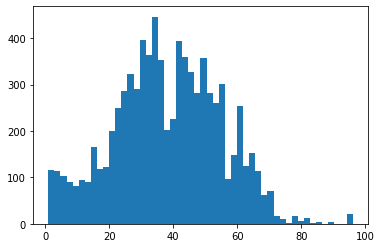

In [224]:
hist(popularity, bins=50)